In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

random.seed(42)
np.random.seed(42)



In [19]:
#initialize weights and bias
def initialize_parameters(input_size):
    W = np.random.randn(input_size, 1)
    b = np.random.randn(1)
    return W, b



In [20]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Avoid overflow
    return 1 / (1 + np.exp(-z))



In [21]:
# Forward propagation
def forward_propagation(X, W, b):
    Z = np.dot(X, W) + b
    A = sigmoid(Z)
    return A


In [22]:

# Backward propagation
def backward_propagation(X, A, Y):
    m = X.shape[0]
    dZ = A - Y.reshape(-1,1)
    dW = np.dot(X.T, dZ) / m
    db = np.sum(dZ) / m
    return dW, db


In [23]:

# Update parameters
def update_parameters(W, b, dW, db, learning_rate):
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b



In [24]:
# Training the model
def train_model(X_train, y_train, learning_rate=0.01, epochs=100):
    input_size = X_train.shape[1]
    W, b = initialize_parameters(input_size)
    losses = []
    epsilon = 1e-7  # Small value to avoid log(0)

    for epoch in range(epochs):
        A = forward_propagation(X_train, W, b)
        dW, db = backward_propagation(X_train, A, y_train)
        W, b = update_parameters(W, b, dW, db, learning_rate)

        # Calculate and store loss
        loss = -np.mean(y_train * np.log(A + epsilon) + (1 - y_train) * np.log(1 - A + epsilon))
        losses.append(loss)

    return W, b, losses


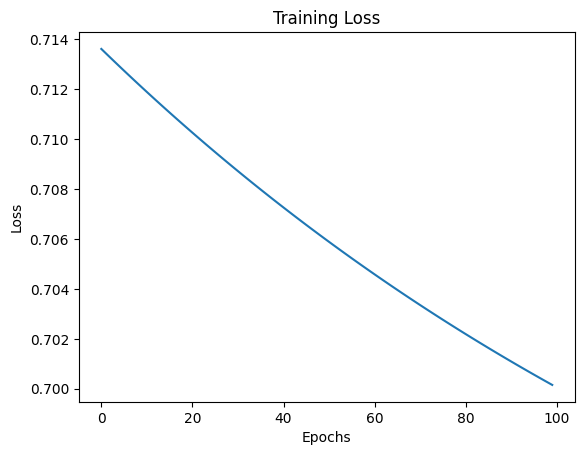

In [25]:

# Generate dataset for XOR gate
sample = 20
x1 = np.where(np.array([random.random() for i in range(sample)]) < 0.5, 0, 1)
x2 = np.where(np.array([random.random() for i in range(sample)]) < 0.5, 0, 1)
y = np.logical_xor(x1, x2).astype(int)

# Combine features into a single array
X = np.column_stack((x1, x2))

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the model
W, b, losses = train_model(X_train, y_train)

# Plotting training loss vs epoch curve
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



In [26]:
# Function to predict outputs
def predict(X, W, b):
    A = forward_propagation(X, W, b)
    predictions = (A > 0.5).astype(int)
    return predictions.flatten()

# Calculate accuracy on test set
predictions = predict(X_test, W, b)
accuracy = np.mean(predictions == y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.5
